# Comparison Notebook for Model Training

In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.style.use(plt.style.available[24])
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the xtick labels
plt.rc('ytick', labelsize=12)     # fontsize of the ytick labels (also applies to colorbar)
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=20)   # fontsize of the figure title
plt.rc('lines', linewidth=2)     # line width
plt.rc('figure', figsize=(6, 5)) # figure size
plt.rc('axes', axisbelow=True)

## Read In Data

In [2]:
df_svgp_noise = pd.read_csv('svgp/results/SVGP_noise_split.csv')
df_svgp_data = pd.read_csv('svgp/results/SVGP_data_split.csv')
df_nn_noise = pd.read_csv('nn/results/NN_noise_split.csv')
df_nn_data = pd.read_csv('nn/results/NN_data_split.csv')
df_poly_noise = pd.read_csv('poly/results/POLY_noise_split.csv')
df_poly_data = pd.read_csv('poly/results/POLY_data_split.csv')


## Make Comparison Plot

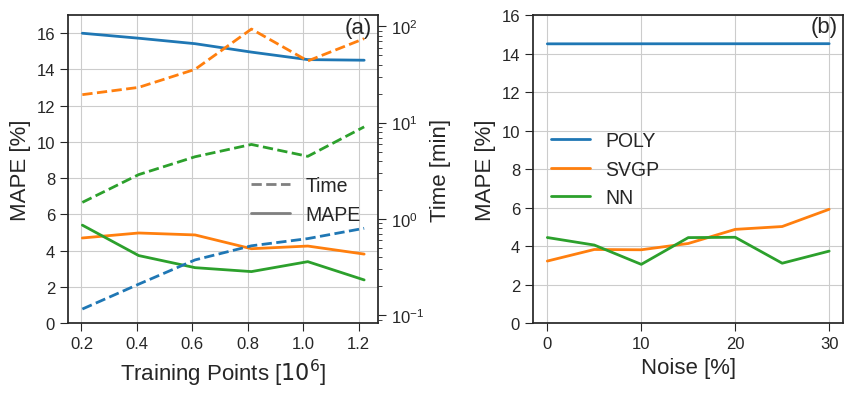

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
for a in ax:
    a.grid(True)
ax[0].set_xlabel('Training Points [$10^6$]')
ax[0].set_ylabel('MAPE [%]')
ax[1].set_xlabel('Noise [%]')
ax[1].set_ylabel('MAPE [%]')

ax[0].plot(df_poly_data['points']/1e6, (df_poly_data['max mape corrected'] + df_poly_data['tot mape corrected'] + df_poly_data['avg mape corrected'])/3, label='POLY')
ax[0].plot(df_svgp_data['points']/1e6, (df_svgp_data['max mape corrected'] + df_svgp_data['tot mape corrected'] + df_svgp_data['avg mape corrected'])/3, label='SVGP')
ax[0].plot(df_nn_data['points']/1e6, (df_nn_data['max mape corrected'] + df_nn_data['tot mape corrected'] + df_nn_data['avg mape corrected'])/3, label='NN')
ax2 = ax[0].twinx()
ax2.plot(df_poly_data['points']/1e6, df_poly_data['time']/60, linestyle='dashed', label='POLY Time')
ax2.plot(df_svgp_data['points']/1e6, df_svgp_data['time']/60, linestyle='dashed', label='SVGP Time')
ax2.plot(df_nn_data['points']/1e6, df_nn_data['time']/60, linestyle='dashed', label='NN Time')
ax2.set_ylabel('Time [min]')
ax2.grid(False)
ax2.set_yscale('log')
ax2.set_frame_on(False)
ax[0].text(1.15, 16, '(a)', fontsize=16)
ax[0].set_ylim(0, 17)

ax[1].plot(df_poly_noise['noise'], (df_poly_noise['max mape corrected'] + df_poly_noise['tot mape corrected'] + df_poly_noise['avg mape corrected'])/3, label='POLY')
ax[1].plot(df_svgp_noise['noise'], (df_svgp_noise['max mape corrected'] + df_svgp_noise['tot mape corrected'] + df_svgp_noise['avg mape corrected'])/3, label='SVGP')
ax[1].plot(df_nn_noise['noise'], (df_nn_noise['max mape corrected'] + df_nn_noise['tot mape corrected'] + df_nn_noise['avg mape corrected'])/3, label='NN')
ax[1].legend(loc='center left')
ax[1].text(28, 15.1, '(b)', fontsize=16)
ax[1].set_ylim(0, 16)

# Add legend for training time
custom_lines = [Line2D([0], [0], color='gray', lw=2, linestyle='dashed'), Line2D([0], [0], color='gray', lw=2, linestyle='solid')]
ax[0].legend(custom_lines, ['Time', 'MAPE'], loc='center right', bbox_to_anchor = (1, 0.4))

fig.subplots_adjust(wspace=0.5)
fig.savefig('plots/combined_train.eps', format='eps', bbox_inches='tight')